Text(0,0.5,'area of largest connected component')

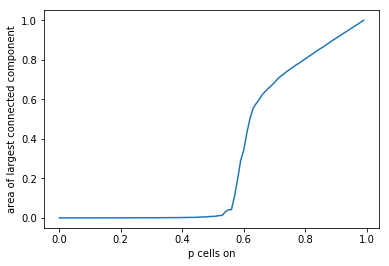

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label

plt.rcParams['animation.ffmpeg_path'] = u'/usr/bin/ffmpeg'    

def percolation_path(field_size=20, precision=.01):
    p = np.random.rand(field_size, field_size)
    rg = np.arange(start=0, stop=1, step=precision)
    max_clusters = []
    biggest_clusters = []
    fields = []
    
    for i in rg:
        labels = label(p < i, connectivity=1)
        max_cluster = 0
        
        # Find the maximum sized cluster.)
        biggest_cluster = np.zeros(labels.shape)
        for j in range(1, labels.max() + 1):
            new_cluster_size = (labels == j).sum()
            if new_cluster_size > max_cluster:
                biggest_cluster = labels == j
            max_cluster = max(new_cluster_size, max_cluster)
            
            
        max_clusters.append(max_cluster)
        biggest_clusters.append(biggest_cluster)
        fields.append(p < i)
    
    return rg, np.array(max_clusters), biggest_clusters, fields

x, max_cluster, biggest_clusters, fields = percolation_path(field_size=200)

plt.plot(x, max_cluster / max_cluster.max())
plt.xlabel('p cells on')
plt.ylabel('area of largest connected component')

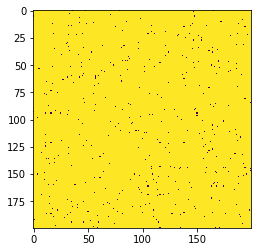

In [70]:
import matplotlib.animation as animation
from IPython.display import HTML

def data_gen(t=0):
    for c, f in zip(biggest_clusters, fields):
        yield c, f

def init():
    return im,

fig, ax = plt.subplots()
im = ax.imshow(np.zeros(biggest_clusters[0].shape), clim=[0, 2])

def run(data):
    # update the data
    c, f = data
    im.set_data(1.0*f + 1.0*c)
    return im,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=100,
                              repeat=False, init_func=init)
ani.save('percolation.mp4')
HTML(ani.to_html5_video())